In [2]:
# Dependencies

import pandas as pd
import numpy as np

%matplotlib notebook
from matplotlib import pyplot as plt
from scipy.stats import linregress

import requests
import json

# Import api keys for weather and gmaps
from config import (weather_key, g_key)

# Import and access maps with API key
import gmaps
gmaps.configure(api_key = g_key)

from datetime import datetime

In [3]:
# Loading raw Covid-19 data for countries

Covid_global_data = pd.read_csv("Resources/Covid19_Global.csv")
temp = Covid_global_data.groupby('Country').sum().drop(["Latitude","Longitude"],axis =1)

<IPython.core.display.Javascript object>


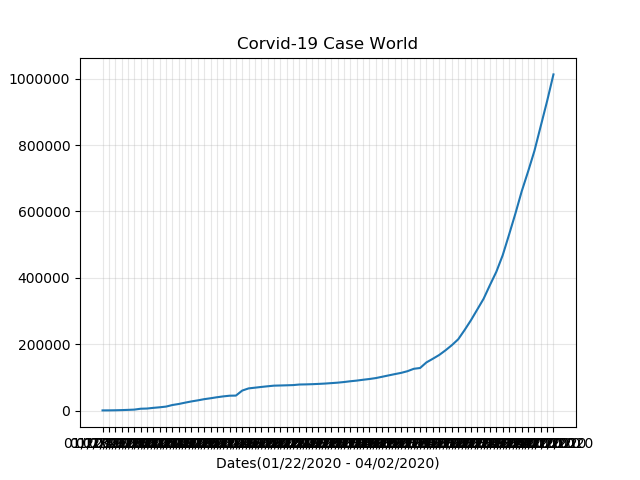

In [4]:
#calculate the total case of global data
total= pd.DataFrame(temp.sum(axis=0))

plt.plot(total)
plt.xlabel("Dates(01/22/2020 - 04/02/2020)")
plt.ylabel("Patient number")
plt.title("Corvid-19 Case World")
plt.grid(alpha = 0.3)
plt.show()

In [22]:
#Sorting the data by 04/02/2020
top_country = temp.sort_values("04/02/2020", ascending = False)
top_country = top_country.iloc[:30,:]
top_country

01/22/2020  01/23/2020  01/24/2020  01/25/2020  01/26/2020  \
Country                                                                      
US                       1           1           2           2           5   
Italy                    0           0           0           0           0   
Spain                    0           0           0           0           0   
Germany                  0           0           0           0           0   
China                  548         643         920        1406        2075   
France                   0           0           2           3           3   
Iran                     0           0           0           0           0   
United Kingdom           0           0           0           0           0   
Switzerland              0           0           0           0           0   
Turkey                   0           0           0           0           0   
Belgium                  0           0           0           0           0   
Netherlands              0           0           0           0           0   
Canada                   0           0           0           0           1   
Austria                  0           0           0           0           0   
Korea, South             1           1           2           2           3   
Portugal                 0           0           0           0           0   
Brazil                   0           0           0           0           0   
Israel                   0           0           0           0           0   
Sweden                   0           0           0           0           0   
Norway                   0           0           0           0           0   
Australia                0           0           0           0           4   
Czechia                  0           0           0           0           0   
Ireland                  0           0           0           0           0   
Denmark                  0           0           0           0           0   
Russia                   0           0           0           0           0   
Chile                    0           0           0           0           0   
Ecuador                  0           0           0           0           0   
Malaysia                 0           0           0           3           4   
Poland                   0           0           0           0           0   
Romania                  0           0           0           0           0   

                01/27/2020  01/28/2020  01/29/2020  01/30/2020  01/31/2020  \
Country                                                                      
US                       5           5           5           5           7   
Italy                    0           0           0           0           2   
Spain                    0           0           0           0           0   
Germany                  1           4           4           4           5   
China                 2877        5509        6087        8141        9802   
France                   3           4           5           5           5   
Iran                     0           0           0           0           0   
United Kingdom           0           0           0           0           2   
Switzerland              0           0           0           0           0   
Turkey                   0           0           0           0           0   
Belgium                  0           0           0           0           0   
Netherlands              0           0           0           0           0   
Canada                   1           2           2           2           4   
Austria                  0           0           0           0           0   
Korea, South             4           4           4           4          11   
Portugal                 0           0           0           0           0   
Brazil                   0           0           0           0           0   
Israel                   0           

<IPython.core.display.Javascript object>


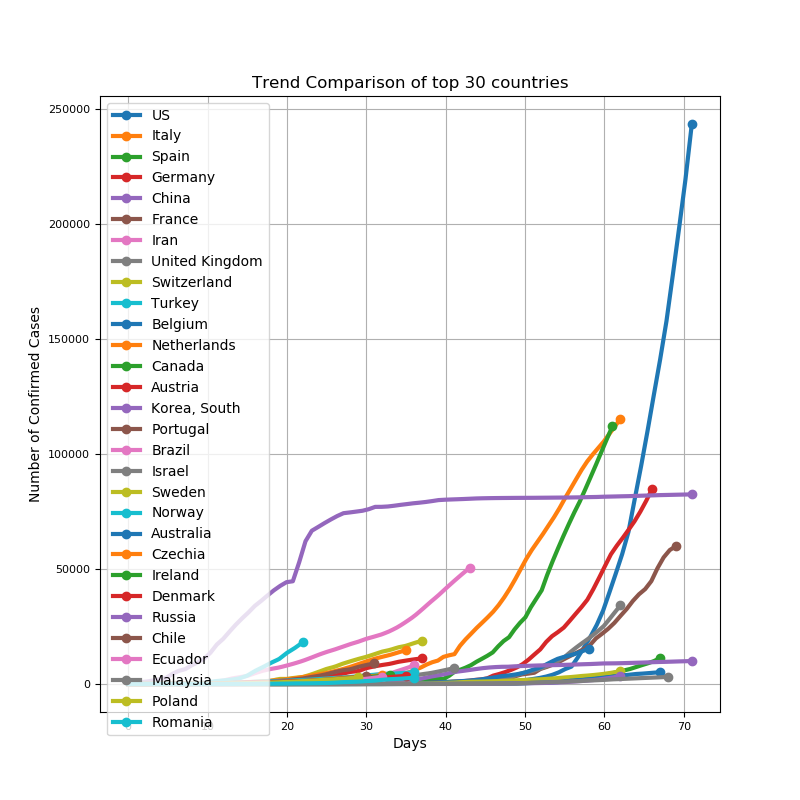

In [25]:
from scipy.interpolate import BSpline, make_interp_spline

threshold = 0
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)

for i,country in enumerate(top_country.index):
    x = 90
    t = top_country.loc[top_country.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 90)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])

plt.tick_params(labelsize = 8)        

# plot Params
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases")
plt.title("Trend Comparison of top 30 countries")
plt.legend(loc = "upper left")
plt.grid(which="both")
plt.show()

In [51]:
top30 = pd.DataFrame(top_country['04/02/2020'])
top10 = top30.iloc[:10, :]

<IPython.core.display.Javascript object>


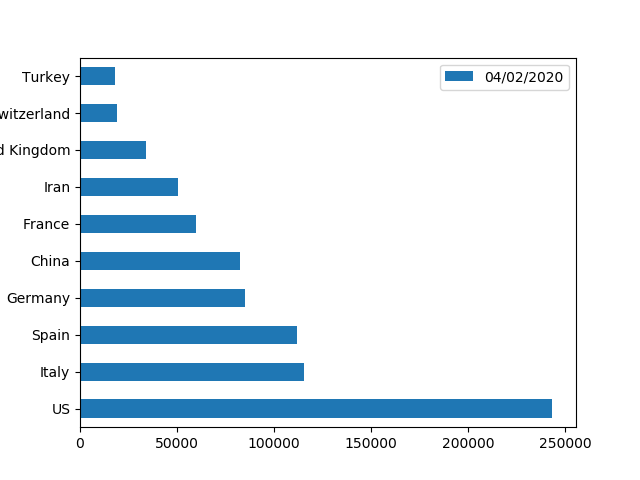

In [87]:
top10.plot(kind='barh')
plt.show()

In [ ]:
#plot top countries trends

In [75]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Retrieving latitudes and longitudes

lats = Covid_global_data["Latitude"]
lngs = Covid_global_data["Longitude"]

lat_lngs = zip(lats, lngs)

# Create a list to store temperatures

temperatures = []

# Aquiring temperatures by making api calls

for lat_lng in lat_lngs:
    
    query_url = f'{base_url}{weather_key}&lat={lat_lng[0]}&lon={lat_lng[1]}'
    
    results = requests.get(query_url).json()
    
    country_temp = results["main"]["temp"]
    
    temperatures.append(country_temp)
    
# Add temperatures to "Temperature" column 

Covid_global_data["Temp(F)"] = temperatures



Province/State       Country   Latitude  Longitude  \
0                                 NaN   Afghanistan  33.000000  65.000000   
1                                 NaN       Albania  41.153300  20.168300   
2                                 NaN       Algeria  28.033900   1.659600   
3                                 NaN       Andorra  42.506300   1.521800   
4                                 NaN        Angola -11.202700  17.873900   
..                                ...           ...        ...        ...   
253                               NaN      Botswana -22.328500  24.684900   
254                               NaN       Burundi  -3.373100  29.918900   
255                               NaN  Sierra Leone   8.460555 -11.779889   
256  Bonaire, Sint Eustatius and Saba   Netherlands  12.178400 -68.238500   
257                               NaN        Malawi -13.254308  34.301525   

     01/22/2020  01/23/2020  01/24/2020  01/25/2020  01/26/2020  01/27/2020  \
0             0           0           0           0           0           0   
1             0           0           0           0           0           0   
2             0           0           0           0           0           0   
3             0           0           0           0           0           0   
4             0           0           0           0           0           0   
..          ...         ...         ...         ...         ...         ...   
253           0           0           0           0           0           0   
254           0           0           0           0           0           0   
255           0           0           0           0           0           0   
256           0           0           0           0           0           0   
257           0           0           0           0           0           0   

     ...  03/25/2020  03/26/2020  03/27/2020  03/28/2020  03/29/2020  \
0    ...          84          94         110         110         120   
1    ...         146         174         186         197         212   
2    ...         302         367         409         454         511   
3    ...         188         224         267         308         334   
4    ...           3           4           4           5           7   
..   ...         ...         ...         ...         ...         ...   
253  ...           0           0           0           0           0   
254  ...           0           0           0           0           0   
255  ...           0           0           0           0           0   
256  ...           0           0           0           0           0   
257  ...           0           0           0           0           0   

     03/30/2020  03/31/2020  04/01/2020  04/02/2020  Temp(F)  
0           170         174         237         273    46.09  
1           223         243         259         277    51.80  
2           584         716         847         986    70.23  
3           370         376         390         428    46.98  
4             7           7           8           8    64.89  
..          ...         ...         ...         ...      ...  
253           3           4           4           4    70.92  
254           0           2           2           3    59.36  
255           0           1           2           2    79.18  
256           0           0           0           2    82.40  
257           0           0           0           3    73.18  

[258 rows x 77 columns]

In [76]:
covid_temp = Covid_global_data[['Province/State','Country','Latitude','Longitude',
                                '01/22/2020',' ''04/02/2020','Temp(F)']]

In [79]:
covid_temp['Country'].value_counts()

China                  33
Canada                 15
France                 10
United Kingdom         10
Australia               8
                       ..
Saudi Arabia            1
Qatar                   1
Costa Rica              1
Congo (Brazzaville)     1
Sweden                  1
Name: Country, Length: 181, dtype: int64

In [82]:
covid_temp_avg = covid_temp.groupby('Country').mean()
covid_temp_avg

Latitude  Longitude  04/02/2020  Temp(F)
Country                                                     
Afghanistan          33.0000    65.0000       273.0    46.09
Albania              41.1533    20.1683       277.0    51.80
Algeria              28.0339     1.6596       986.0    70.23
Andorra              42.5063     1.5218       428.0    46.98
Angola              -11.2027    17.8739         8.0    64.89
...                      ...        ...         ...      ...
Venezuela             6.4238   -66.5897       146.0    79.43
Vietnam              16.0000   108.0000       233.0    77.00
West Bank and Gaza   31.9522    35.2332       161.0    57.63
Zambia              -15.4167    28.2833        39.0    68.00
Zimbabwe            -20.0000    30.0000         9.0    70.47

[181 rows x 4 columns]

<IPython.core.display.Javascript object>


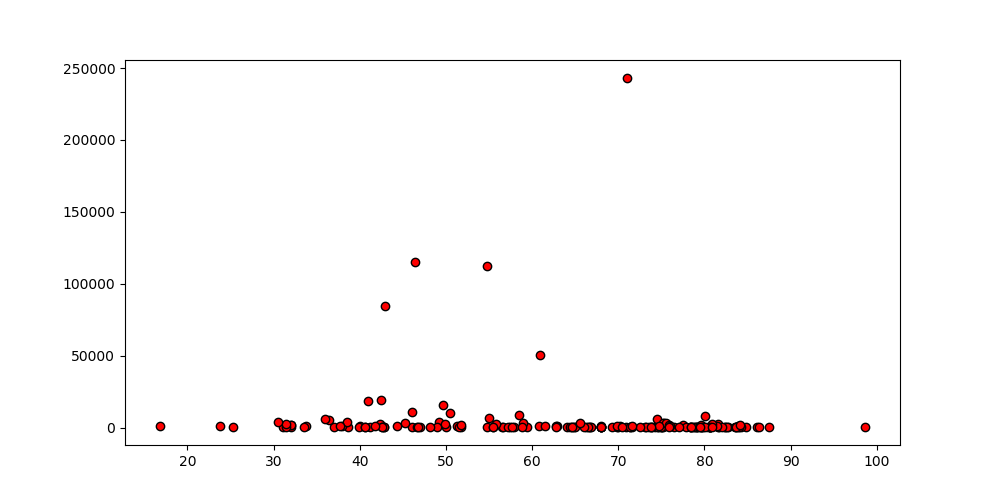

In [89]:
x=covid_temp_avg['Temp(F)']
y=covid_temp_avg['04/02/2020']

plt.figure(figsize=(10, 5))


plt.scatter (x, y,
             marker="o",
             facecolors="red",
             edgecolors="black")

plt.show()

Latitude  Longitude  01/22/2020  01/23/2020  01/24/2020  \
Country                                                                       
Afghanistan          33.0000    65.0000           0           0           0   
Albania              41.1533    20.1683           0           0           0   
Algeria              28.0339     1.6596           0           0           0   
Andorra              42.5063     1.5218           0           0           0   
Angola              -11.2027    17.8739           0           0           0   
...                      ...        ...         ...         ...         ...   
Venezuela             6.4238   -66.5897           0           0           0   
Vietnam              16.0000   108.0000           0           2           2   
West Bank and Gaza   31.9522    35.2332           0           0           0   
Zambia              -15.4167    28.2833           0           0           0   
Zimbabwe            -20.0000    30.0000           0           0           0   

                    01/25/2020  01/26/2020  01/27/2020  01/28/2020  \
Country                                                              
Afghanistan                  0           0           0           0   
Albania                      0           0           0           0   
Algeria                      0           0           0           0   
Andorra                      0           0           0           0   
Angola                       0           0           0           0   
...                        ...         ...         ...         ...   
Venezuela                    0           0           0           0   
Vietnam                      2           2           2           2   
West Bank and Gaza           0           0           0           0   
Zambia                       0           0           0           0   
Zimbabwe                     0           0           0           0   

                    01/29/2020  ...  03/24/2020  03/25/2020  03/26/2020  \
Country                         ...                                       
Afghanistan                  0  ...          74          84          94   
Albania                      0  ...         123         146         174   
Algeria                      0  ...         264         302         367   
Andorra                      0  ...         164         188         224   
Angola                       0  ...           3           3           4   
...                        ...  ...         ...         ...         ...   
Venezuela                    0  ...          84          91         107   
Vietnam                      2  ...         134         141         153   
West Bank and Gaza           0  ...          59          59          84   
Zambia                       0  ...           3          12          16   
Zimbabwe                     0  ...           3           3           3   

                    03/27/2020  03/28/2020  03/29/2020  03/30/2020  \
Country                                                              
Afghanistan                110         110         120         170   
Albania                    186         197         212         223   
Algeria                    409         454         511         584   
Andorra                    267         308         334         370   
Angola                       4           5           7           7   
...                        ...         ...         ...         ...   
Venezuela                  107         119         119         135   
Vietnam                    163         174         188         203   
West Bank and Gaza          91          98         109         116   
Zambia                      22          28          29          35   
Zimbabwe                     5           7           7           7   

                    03/31/2020  04/01/2020  04/02/2020  
Country                                                 
Afghanistan                174         237         273  
Albania                

In [63]:
Temp['Temp(F)']=""

In [73]:
# Country_temperatures 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Retrieving latitudes and longitudes
lats = Temp["Latitude"]
lngs = Temp["Longitude"]
lat_lngs = zip(lats, lngs)

# Create a list to store temperatures
# temperatures = []

# Aquiring temperatures by making api calls
for lat_lng in lat_lngs:
    
    try:
        query_url = f'{base_url}{weather_key}&lat={lat_lng[0]}&lon={lat_lng[1]}'
        results = requests.get(query_url).json()
        country_temp = results["main"]["temp"]
        Temp['Temp(F)']=country_temp
        
    except:
        print("Country not found. Skipping...")
        pass
    

Country not found. Skipping...
Country not found. Skipping...
Country not found. Skipping...
Country not found. Skipping...
Country not found. Skipping...
Country not found. Skipping...


In [74]:
Temp.head(30)

Latitude  Longitude  01/22/2020  01/23/2020  \
Country                                                               
Afghanistan              33.0000    65.0000           0           0   
Albania                  41.1533    20.1683           0           0   
Algeria                  28.0339     1.6596           0           0   
Andorra                  42.5063     1.5218           0           0   
Angola                  -11.2027    17.8739           0           0   
Antigua and Barbuda      17.0608   -61.7964           0           0   
Argentina               -38.4161   -63.6167           0           0   
Armenia                  40.0691    45.0382           0           0   
Australia              -255.9695  1129.8623           0           0   
Austria                  47.5162    14.5501           0           0   
Azerbaijan               40.1431    47.5769           0           0   
Bahamas                  25.0343   -77.3963           0           0   
Bahrain                  26.0275    50.5500           0           0   
Bangladesh               23.6850    90.3563           0           0   
Barbados                 13.1939   -59.5432           0           0   
Belarus                  53.7098    27.9534           0           0   
Belgium                  50.8333     4.0000           0           0   
Belize                   13.1939   -59.5432           0           0   
Benin                     9.3077     2.3158           0           0   
Bhutan                   27.5142    90.4336           0           0   
Bolivia                 -16.2902   -63.5887           0           0   
Bosnia and Herzegovina   43.9159    17.6791           0           0   
Botswana                -22.3285    24.6849           0           0   
Brazil                  -14.2350   -51.9253           0           0   
Brunei                    4.5353   114.7277           0           0   
Bulgaria                 42.7339    25.4858           0           0   
Burkina Faso             12.2383    -1.5616           0           0   
Burma                    21.9162    95.9560           0           0   
Burundi                  -3.3731    29.9189           0           0   
Cabo Verde               16.5388   -23.0418           0           0   

                        01/24/2020  01/25/2020  01/26/2020  01/27/2020  \
Country                                                                  
Afghanistan                      0           0           0           0   
Albania                          0           0           0           0   
Algeria                          0           0           0           0   
Andorra                          0           0           0           0   
Angola                           0           0           0           0   
Antigua and Barbuda              0           0           0           0   
Argentina                        0           0           0           0   
Armenia                          0           0           0           0   
Australia                        0           0           4           5   
Austria                          0           0           0           0   
Azerbaijan                       0           0           0           0   
Bahamas                          0           0           0           0   
Bahrain                          0           0           0           0   
Bangladesh                       0           0           0           0   
Barbados                         0           0           0           0   
Belarus                          0           0           0           0   
Belgium                          0           0           0           0   
Belize                           0           0           0           0   
Benin                            0           0           0           0   
Bhutan                           0           0           0           0   
Bolivia                          0           0           0           0   
Bosnia and Herzegovina           0           0   